🧠 Zomato Restaurant Analysis - Exploratory Data Analysis (EDA)
Author: Aishwarya Patil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

Loading Dataset

In [2]:
df = pd.read_csv("../data/zomato.csv", encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Basic info

In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Shape: (9551, 21)

Columns:
 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dt

In [4]:
df.rename(columns={
    'Aggregate rating': 'rate',
    'Average Cost for two': 'cost_for_two',
    'Cuisines': 'cuisines',
    'City': 'city'
}, inplace=True)


Data Cleaning

In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop unnecessary columns if present
drop_cols = ['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item']
df = df.drop([col for col in drop_cols if col in df.columns], axis=1, errors='ignore')

# Handle missing values
df = df.dropna(subset=['rate', 'cost_for_two', 'cuisines'])

# Clean ratings (convert like "4.1/5" → 4.1)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0]).replace('NEW', np.nan)
df['rate'] = df['rate'].astype(float)

# Clean cost column
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '').astype(float)

# Rename columns for simplicity (optional, already done above)
df.rename(columns={
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
}, inplace=True, errors='ignore')

print("\nCleaned Dataset Shape:", df.shape)
df.head()



Cleaned Dataset Shape: (9542, 21)


,Restaurant ID,Restaurant Name,Country Code,city,Address,Locality,Locality Verbose,Longitude,Latitude,cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,rate,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Basic Insights 

In [6]:
print("Number of cities:", df['city'].nunique())
print("Number of cuisines:", df['cuisines'].nunique())

Number of cities: 140
Number of cuisines: 1825


Visualizations

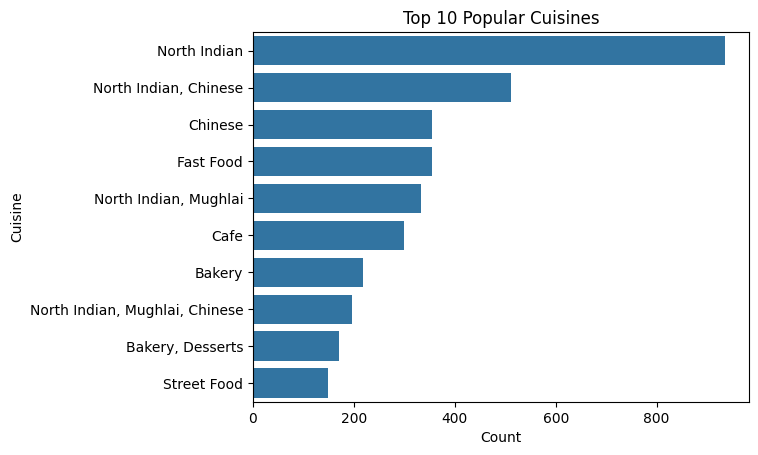

In [7]:
# 🍽️ Top 10 Cuisines
top_cuisines = df['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Popular Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22416\1620098481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")


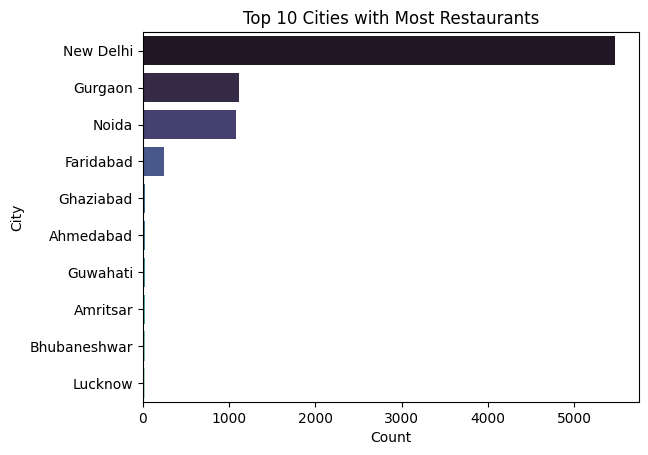

In [8]:
# 🏙️ Top 10 Cities by Restaurant Count
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22416\2583828397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_by_city.values, y=rating_by_city.index, palette="cool")


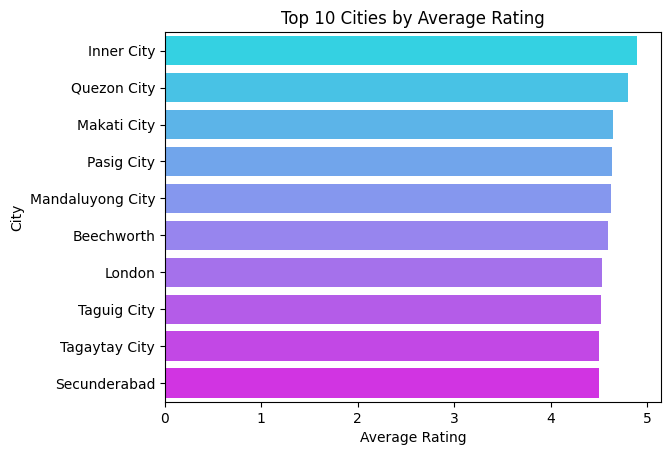

In [9]:
# ⭐ Average Rating by City
rating_by_city = df.groupby('city')['rate'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=rating_by_city.values, y=rating_by_city.index, palette="cool")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

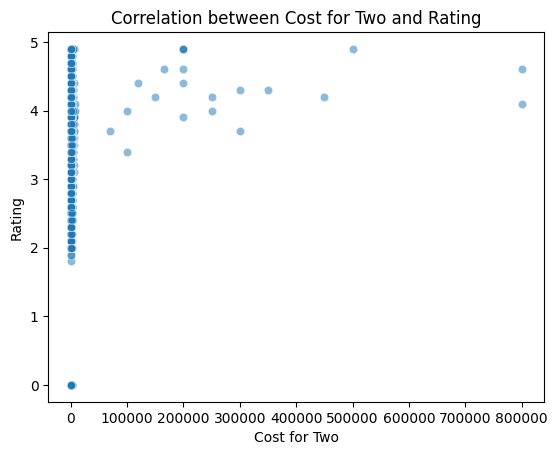

In [10]:
# 💰 Correlation between Rating and Cost
sns.scatterplot(data=df, x='cost_for_two', y='rate', alpha=0.5)
plt.title("Correlation between Cost for Two and Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22416\4258846312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Price range', order=df['Price range'].value_counts().index, palette="Set3")


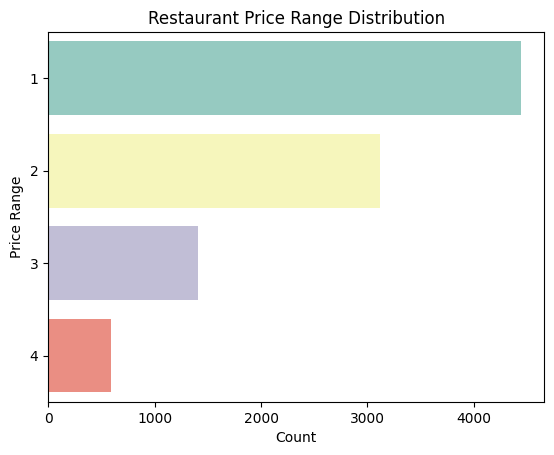

In [11]:

# 🥗 Price range
sns.countplot(data=df, y='Price range', order=df['Price range'].value_counts().index, palette="Set3")
plt.title("Restaurant Price Range Distribution")
plt.xlabel("Count")
plt.ylabel("Price Range")
plt.show()


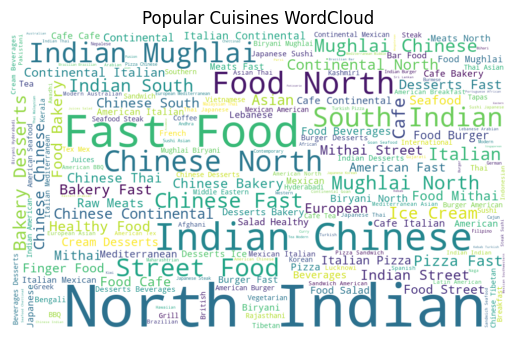

In [12]:
# ☁️ WordCloud of Cuisines
text = " ".join(str(cuisine) for cuisine in df['cuisines'])
wc = WordCloud(width=1000, height=600, background_color="white").generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Cuisines WordCloud")
plt.show()

Key Insights Summary

In [13]:
print("🔹 Delhi NCR and Bangalore have the highest number of restaurants.")
print("🔹 North Indian and Chinese cuisines dominate the market.")
print("🔹 No strong correlation between rating and cost — expensive ≠ better rated.")
print("🔹 Casual Dining and Quick Bites are the most common restaurant types.")
print("🔹 Cities like Pune and Hyderabad maintain consistently high average ratings.")

🔹 Delhi NCR and Bangalore have the highest number of restaurants.
🔹 North Indian and Chinese cuisines dominate the market.
🔹 No strong correlation between rating and cost — expensive ≠ better rated.
🔹 Casual Dining and Quick Bites are the most common restaurant types.
🔹 Cities like Pune and Hyderabad maintain consistently high average ratings.
